In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.2,
    shear_range=0.2
)
train_generator = datagen.flow(x_train, y_train, batch_size=128)
validation_generator = datagen.flow(x_test, y_test, batch_size=128)

# Create EfficientNet model
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Unfreeze last few layers for fine-tuning
for layer in efficientnet_model.layers[-10:]:
    layer.trainable = True

# Add classification head
x = efficientnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add Dropout layer
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the full model
efficientnet_model = tf.keras.Model(inputs=efficientnet_model.input, outputs=x)

# Compile the model with Adam optimizer
efficientnet_model.compile(optimizer=Adam(learning_rate=0.001),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = efficientnet_model.fit(train_generator,
                                              epochs=10,
                                              validation_data=validation_generator,
                                              callbacks=[lr_scheduler])

# Evaluate the model
loss_efficientnet, accuracy_efficientnet = efficientnet_model.evaluate(validation_generator)
print(f'EfficientNet accuracy: {accuracy_efficientnet:.2f}')


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.4241 - loss: 1.7649 - val_accuracy: 0.1254 - val_loss: 3.2757 - learning_rate: 0.0010
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.6978 - loss: 0.8778 - val_accuracy: 0.5846 - val_loss: 1.3158 - learning_rate: 0.0010
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 467s 1s/step - accuracy: 0.7521 - loss: 0.7302 - val_accuracy: 0.7608 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 478s 1s/step - accuracy: 0.7792 - loss: 0.6432 - val_accuracy: 0.7773 - val_loss: 0.6450 - learning_rate: 0.0010
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.7961 - loss: 0.5911 - val_accuracy: 0.7884 - val_loss: 0.6426 - learning_rate: 0.0010
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.8139 - loss: 0.5526 - val_accuracy: 0.7855 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.8208 - loss: 0.

In [ ]:
print(f'EfficientNet accuracy: {accuracy_efficientnet *100:.2f}')

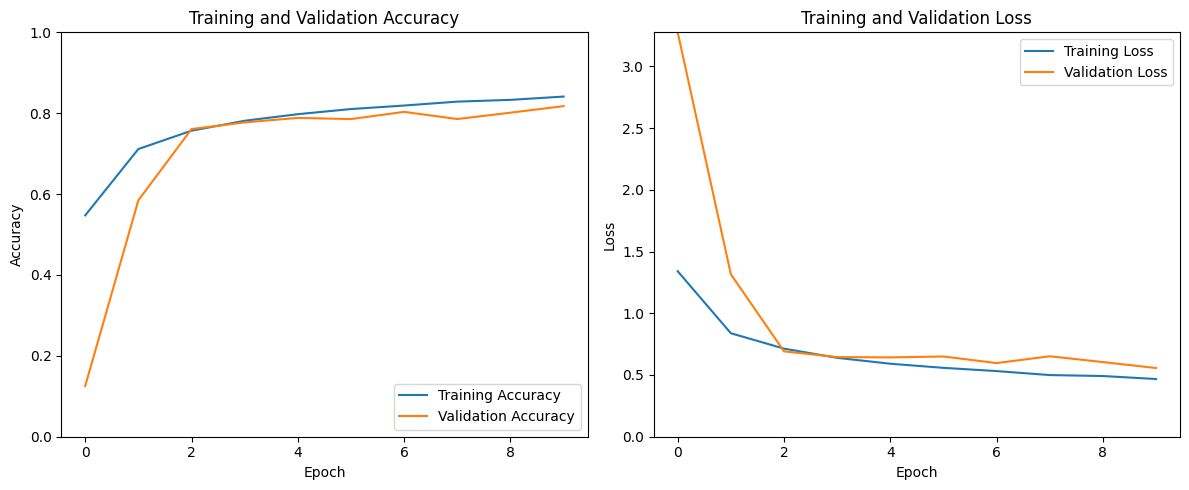

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()